In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Ler e entender um arquivo csv

In [2]:
dados = pd.read_csv('dados/aluguel.csv', sep=";")
type(dados)

pandas.core.frame.DataFrame

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
Tipo          32960 non-null object
Bairro        32960 non-null object
Quartos       32960 non-null int64
Vagas         32960 non-null int64
Suites        32960 non-null int64
Area          32960 non-null int64
Valor         32943 non-null float64
Condominio    28867 non-null float64
IPTU          22723 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [4]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


### Renomear colunas

In [5]:
tipos_de_dados = pd.DataFrame(dados.dtypes, columns = ['Tipos de Dados'])
tipos_de_dados.columns.name = 'Variáveis'
tipos_de_dados

Variáveis,Tipos de Dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


### Dimensão dos dados

In [6]:
dados.shape

(32960, 9)

In [7]:
print('A base de dados apresenta {} registros (imóveis) e {} variáveis'.format(dados.shape[0], dados.shape[1]))

A base de dados apresenta 32960 registros (imóveis) e 9 variáveis


# Relatório de Análise II

## Tipos de Imóveis

In [8]:
dados['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
5                    Apartamento
6                    Apartamento
7             Casa de Condomínio
8             Casa de Condomínio
9        Conjunto Comercial/Sala
10                   Apartamento
11                   Apartamento
12                   Apartamento
13                   Apartamento
14                     Quitinete
15                   Apartamento
16                Prédio Inteiro
17                          Flat
18            Casa de Condomínio
19                   Apartamento
20                   Apartamento
21                   Apartamento
22            Casa de Condomínio
23                   Apartamento
24                   Apartamento
25                          Flat
26       Conjunto Comercial/Sala
27                   Apartamento
28                   Apartamento
29                    Loja/Salão
          

In [9]:
tipo_de_imovel = dados['Tipo']
type(tipo_de_imovel)

pandas.core.series.Series

### Mas é muito ruim de ver assim, então vamos tirar os duplicados

In [10]:
tipo_de_imovel.drop_duplicates()

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

In [11]:
tipo_de_imovel.head()

0                  Quitinete
1                       Casa
2    Conjunto Comercial/Sala
3                Apartamento
4                Apartamento
Name: Tipo, dtype: object

### Algumas funções podem ter o argumento 'inplace', se isso for True, ele vai modificar a variável mesmo quando não está sendo atribuída para uma variável 

In [12]:
tipo_de_imovel.drop_duplicates(inplace = True)
tipo_de_imovel.head()

0                  Quitinete
1                       Casa
2    Conjunto Comercial/Sala
3                Apartamento
7         Casa de Condomínio
Name: Tipo, dtype: object

### Agora vamos corrigir o índice dessa tabela

In [13]:
tipo_de_imovel = pd.DataFrame(tipo_de_imovel)
tipo_de_imovel.index
tipo_de_imovel.shape[0]
tipo_de_imovel.index = range(tipo_de_imovel.shape[0])
tipo_de_imovel.columns.name = 'id'
tipo_de_imovel

id,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


# Relatório 3

In [14]:
dados = pd.read_csv('dados/aluguel.csv', sep=";") # Só porque o cara fez eu mudar os dados antes
list(dados['Tipo'].drop_duplicates())

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

## Classificando imóveis residenciais

In [15]:
residencial = ['Quitinete',
'Casa',
'Apartamento',
'Casa de Condomínio',
'Casa de Vila']
dados['Tipo'].isin(residencial).head(10)

0     True
1     True
2    False
3     True
4     True
5     True
6     True
7     True
8     True
9    False
Name: Tipo, dtype: bool

In [16]:
selecao = dados['Tipo'].isin(residencial)
selecao

0         True
1         True
2        False
3         True
4         True
5         True
6         True
7         True
8         True
9        False
10        True
11        True
12        True
13        True
14        True
15        True
16       False
17       False
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25       False
26       False
27        True
28        True
29       False
         ...  
32930     True
32931     True
32932     True
32933     True
32934     True
32935     True
32936     True
32937    False
32938     True
32939    False
32940     True
32941     True
32942    False
32943     True
32944     True
32945     True
32946    False
32947     True
32948    False
32949     True
32950     True
32951     True
32952     True
32953     True
32954    False
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

In [17]:
dados_residencial = dados[selecao]
list(dados_residencial['Tipo'].drop_duplicates())
dados_residencial.shape[0] 
dados_residencial.index = range(dados_residencial.shape[0])
dados_residencial.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


# Salvar o resultado em csv

In [18]:
dados_residencial.to_csv('dados/aluguel_residencial.csv', sep = ';')

### Lendo só para ver como fica

In [19]:
dados_residencial_2 = pd.read_csv('dados/aluguel_residencial.csv', sep =';')
dados_residencial_2.head()

,Unnamed: 0,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


### Poxa... tem um índice feio... vamos corrigir

In [20]:
dados_residencial.to_csv('dados/aluguel_residencial.csv', sep=';', index = False)
dados_residencial_2 = pd.read_csv('dados/aluguel_residencial.csv', sep =';')
dados_residencial_2.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


# Relatório de Análise IV
## Seleção e Frequências

In [21]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


# Selecione somente os imóveis classificados com tipo 'Apartamento'.

In [22]:
selecao = dados['Tipo'] == 'Apartamento'
n1 = dados[selecao].shape[0]
n1

19532

# Selecione os imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'.

In [23]:
selecao = (dados['Tipo'] == 'Casa') | (dados['Tipo'] == 'Casa de Condomínio') | (dados['Tipo'] == 'Casa de Vila')
n2 = dados[selecao].shape[0]
n2 

2212

# Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites.
# 60 <= Area <=100

In [24]:
selecao = (dados['Area'] >= 60) & (dados['Area'] <= 100)
n3 = dados[selecao].shape[0]
n3

8719

# Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00.

In [25]:
selecao = (dados['Quartos'] >= 4) & (dados['Valor'] < 2000)
n4 = dados[selecao].shape[0]
n4

41

In [26]:
print("Nº de imóveis classificados com tipo 'Apartamento' -> {}".format(n1))
print("Nº de imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'-> {}".format(n2))
print("Nº de imóveis com área entre 60 e 100 metros quadrados, incluindo os limites -> {}".format(n3))
print("Nº de imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 -> {}".format(n4))

Nº de imóveis classificados com tipo 'Apartamento' -> 19532
Nº de imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'-> 2212
Nº de imóveis com área entre 60 e 100 metros quadrados, incluindo os limites -> 8719
Nº de imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 -> 41


# Relatório de Análise  V
## Tratamento de Dados Faltantes 

In [27]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [28]:
dados.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,True
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False,True,True
8,False,False,False,False,False,False,False,True,True
9,False,False,False,False,False,False,False,False,False


In [29]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22580 entries, 0 to 22579
Data columns (total 9 columns):
Tipo          22580 non-null object
Bairro        22580 non-null object
Quartos       22580 non-null int64
Vagas         22580 non-null int64
Suites        22580 non-null int64
Area          22580 non-null int64
Valor         22571 non-null float64
Condominio    20765 non-null float64
IPTU          15795 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


In [30]:
dados[dados['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
58,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
1492,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
1683,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2012,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2034,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
4941,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
8568,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
8947,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
9149,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


In [31]:
A = dados.shape[0]
dados.dropna(subset = ['Valor'])
B = dados.shape[0]
A - B

0

In [32]:
dados[dados['Condominio'].isnull()].shape[0]
selecao = (dados['Tipo'] == 'Apartamento') & (dados['Condominio'].isnull())
A = dados.shape[0]
dados = dados[~selecao]
B = dados.shape[0]
A - B

745

In [33]:
dados[dados['Condominio'].isnull()].shape[0]

1070

In [34]:
selecao = (dados['Tipo'] == 'Apartamento') & (dados['Condominio'].isnull())
dados.fillna(0, inplace = True)
dados = dados.fillna({'Condominio': 0, 'IPTU': 0})
dados.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21835 entries, 0 to 22579
Data columns (total 9 columns):
Tipo          21835 non-null object
Bairro        21835 non-null object
Quartos       21835 non-null int64
Vagas         21835 non-null int64
Suites        21835 non-null int64
Area          21835 non-null int64
Valor         21835 non-null float64
Condominio    21835 non-null float64
IPTU          21835 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [35]:
dados.to_csv('dados/aluguel_residencial.csv', sep = ';', index = False)

# Criando novas variáveis

In [36]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0


In [37]:
dados['Valor Bruto'] = dados['Valor'] + dados['Condominio'] + dados['IPTU']
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0


In [38]:
dados['Valor m2'] = dados['Valor']/dados['Area']
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.500000
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.000000
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.333333
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.666667
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.000000
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.333333
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.384615
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.428571
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.666667
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.000000


In [39]:
dados['Valor m2'] = dados['Valor m2'].round(2)
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00


In [40]:
dados['Valor Bruto m2'] = (dados['Valor Bruto']/dados['Area']).round(2)
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,15.38
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,31.66
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,21.88
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,65.28


In [41]:
casa = ['Casa', 'Casa de Condomínio', 'Casa de Vila']
dados['Tipo Agregado'] = dados['Tipo'].apply(lambda x: 'Casa' if x in casa else 'Apartamento')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,31.66,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,21.88,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,65.28,Apartamento


# Valor Bruto está errado, então vamos tirar.

In [42]:
dados_aux = pd.DataFrame(dados[['Tipo Agregado', 'Valor m2', 'Valor Bruto', 'Valor Bruto m2']])
dados_aux.head(10)

,Tipo Agregado,Valor m2,Valor Bruto,Valor Bruto m2
0,Apartamento,42.50,2260.0,56.50
1,Casa,70.00,7000.0,70.00
2,Apartamento,53.33,1210.0,80.67
3,Apartamento,16.67,1030.0,21.46
4,Apartamento,26.00,1618.0,32.36
5,Casa,29.33,22000.0,29.33
6,Casa,15.38,1000.0,15.38
7,Apartamento,21.43,2216.0,31.66
8,Apartamento,16.67,1969.0,21.88
9,Apartamento,50.00,2611.0,65.28


In [43]:
del dados_aux['Valor Bruto']
dados_aux.head(10)

,Tipo Agregado,Valor m2,Valor Bruto m2
0,Apartamento,42.50,56.50
1,Casa,70.00,70.00
2,Apartamento,53.33,80.67
3,Apartamento,16.67,21.46
4,Apartamento,26.00,32.36
5,Casa,29.33,29.33
6,Casa,15.38,15.38
7,Apartamento,21.43,31.66
8,Apartamento,16.67,21.88
9,Apartamento,50.00,65.28


In [44]:
dados_aux.pop('Valor Bruto m2')
dados_aux.head(10)

,Tipo Agregado,Valor m2
0,Apartamento,42.50
1,Casa,70.00
2,Apartamento,53.33
3,Apartamento,16.67
4,Apartamento,26.00
5,Casa,29.33
6,Casa,15.38
7,Apartamento,21.43
8,Apartamento,16.67
9,Apartamento,50.00


In [45]:
dados.drop(['Valor Bruto', 'Valor Bruto m2'], axis = 1, inplace = True)
dados.to_csv('dados/aluguel_residencial.csv', sep = ';', index = False)

In [46]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


# Contadores, quantos imóveis tem de cada tipo?

In [47]:
dados = pd.read_csv('dados/aluguel.csv', sep = ';')

In [48]:
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [49]:
dados.Tipo.value_counts()

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Chácara                            1
Pousada/Chalé                      1
Indústria                          1
Name: Tipo, dtype: int64

# Criando agrupamentos

In [50]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [51]:
dados['Valor'].mean()

5044.092878406229

In [52]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
14,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,25.37,Apartamento
15,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,17.27,Apartamento
16,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,0.0,16.09,Casa
18,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,0.0,25.64,Apartamento
19,Apartamento,Ipanema,3,1,1,125,7000.0,2100.0,463.0,56.00,Apartamento


In [53]:
dados['Bairro'].drop_duplicates()
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
14,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,25.37,Apartamento
15,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,17.27,Apartamento
16,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,0.0,16.09,Casa
18,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,0.0,25.64,Apartamento
19,Apartamento,Ipanema,3,1,1,125,7000.0,2100.0,463.0,56.00,Apartamento


In [54]:
grupo_bairro = dados.groupby('Bairro')
grupo_bairro
for bairro, data in grupo_bairro: 
    print(bairro)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [55]:
for bairro, dados in grupo_bairro: 
    print('{} -> {}'.format(bairro, dados.Valor.mean()))

Barra da Tijuca -> 7067.7233436853
Botafogo -> 8781.768878718536
Copacabana -> 4125.116824196597
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874
Tijuca -> 2043.52


In [56]:
grupo_bairro['Valor'].mean()

Bairro
Barra da Tijuca    7067.723344
Botafogo           8781.768879
Copacabana         4125.116824
Flamengo           4113.526611
Ipanema            9352.001134
Leblon             8746.344992
Tijuca             2043.520000
Name: Valor, dtype: float64

In [58]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3864.0,7067.72,11873.16,0.0,2500.0,4500.0,8500.00,600000.0
Botafogo,874.0,8781.77,152115.50,0.0,2200.0,3000.0,4341.25,4500000.0
Copacabana,2645.0,4125.12,3611.62,0.0,2000.0,3000.0,4800.00,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.00,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.00,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.00,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.00,45000.0


In [59]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,0.0,600000.0,27309683.0
Botafogo,0.0,4500000.0,7675266.0
Copacabana,0.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [62]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo,sum
Bairro,,,
Barra da Tijuca,0.0,600000.0,27309683.0
Botafogo,0.0,4500000.0,7675266.0
Copacabana,0.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [64]:
%matplotlib inline
plt.rc('figure', figsize = (20,10))

Text(0.5,1,'Valor Médio do Aluguel por Bairro')

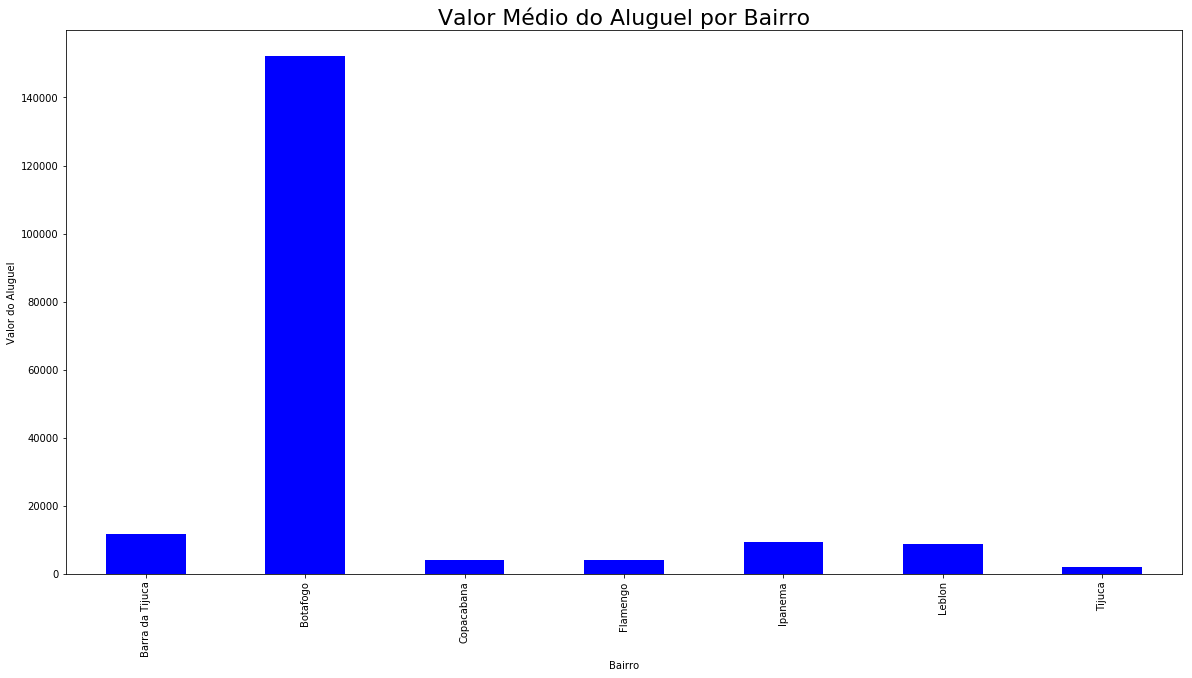

In [66]:
fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

# Criando faixas de valor

In [68]:
dados = pd.read_csv('dados/aluguel.csv', sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [69]:
# 1 e 2
# 3 e 4
# 5 e 6
# 7 e 8
classes = [0, 2, 4, 6, 100]

In [71]:
quartos = pd.cut(dados.Quartos, classes)
quartos

0        (0, 2]
1        (0, 2]
2           NaN
3        (0, 2]
4        (0, 2]
5        (2, 4]
6        (0, 2]
7        (4, 6]
8        (0, 2]
9           NaN
10       (0, 2]
11       (0, 2]
12       (2, 4]
13       (0, 2]
14       (0, 2]
15       (2, 4]
16          NaN
17       (2, 4]
18       (2, 4]
19       (2, 4]
20       (0, 2]
21       (0, 2]
22       (2, 4]
23       (2, 4]
24       (0, 2]
25       (0, 2]
26          NaN
27       (2, 4]
28       (0, 2]
29          NaN
          ...  
32930    (0, 2]
32931    (4, 6]
32932    (2, 4]
32933    (0, 2]
32934    (0, 2]
32935    (0, 2]
32936    (0, 2]
32937       NaN
32938    (0, 2]
32939       NaN
32940    (0, 2]
32941    (2, 4]
32942       NaN
32943    (2, 4]
32944    (2, 4]
32945    (0, 2]
32946       NaN
32947    (2, 4]
32948       NaN
32949    (2, 4]
32950    (0, 2]
32951    (0, 2]
32952    (4, 6]
32953    (0, 2]
32954       NaN
32955       NaN
32956    (2, 4]
32957    (0, 2]
32958    (0, 2]
32959       NaN
Name: Quartos, Length: 3

In [72]:
pd.value_counts(quartos)

(0, 2]      12419
(2, 4]       9894
(4, 6]        709
(6, 100]       87
Name: Quartos, dtype: int64

In [73]:
labels = ['1 e 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7 quartos ou mais' ]
quartos = pd.cut(dados.Quartos, classes, labels = labels)
pd.value_counts(quartos)

1 e 2 quartos        12419
3 e 4 quartos         9894
5 e 6 quartos          709
7 quartos ou mais       87
Name: Quartos, dtype: int64

In [75]:
quartos = pd.cut(dados.Quartos, classes, labels = labels, include_lowest = True)
pd.value_counts(quartos)

1 e 2 quartos        22270
3 e 4 quartos         9894
5 e 6 quartos          709
7 quartos ou mais       87
Name: Quartos, dtype: int64

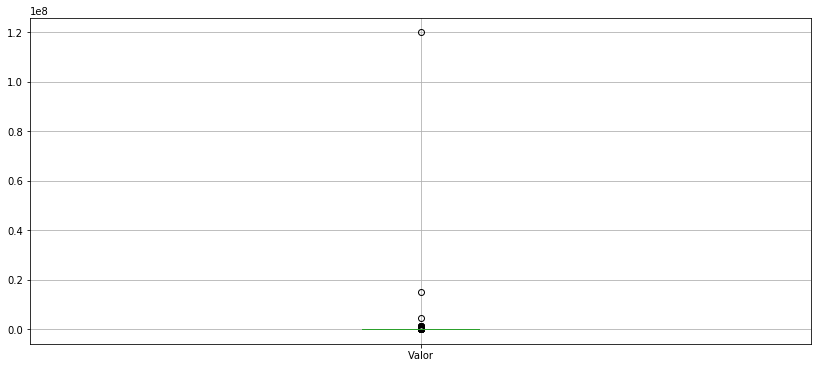

In [77]:
plt.rc('figure', figsize = (14,6))
dados.boxplot(['Valor'])

In [78]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
826,Conjunto Comercial/Sala,Barra da Tijuca,0,0,0,5124,614000.0,NaN,NaN
884,Conjunto Comercial/Sala,Botafogo,0,56,0,4235,529375.0,114599.0,34345.0
1163,Conjunto Comercial/Sala,Cidade Nova,0,47,0,7357,514990.0,166709.0,14787.0
2722,Conjunto Comercial/Sala,Centro,0,15,0,5666,530000.0,1.0,1.0
2994,Prédio Inteiro,Barra da Tijuca,0,40,0,7500,600000.0,162000.0,13350.0
4595,Galpão/Depósito/Armazém,Irajá,0,5,0,1100,15000000.0,NaN,1000.0
4628,Prédio Inteiro,Centro,0,0,0,6986,560000.0,NaN,NaN
5565,Conjunto Comercial/Sala,Centro,0,30,0,4940,612550.0,128440.0,NaN
5592,Prédio Inteiro,Jacarepaguá,0,15,0,1200,120000000.0,NaN,10000.0
8067,Prédio Inteiro,Centro,0,90,0,7774,505310.0,NaN,NaN


In [80]:
valor = dados['Valor']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
print(limite_inferior)
print(limite_superior)

-6000.0
14000.0


In [81]:
selecao = (valor >=limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1634046c50>]],
      dtype=object)

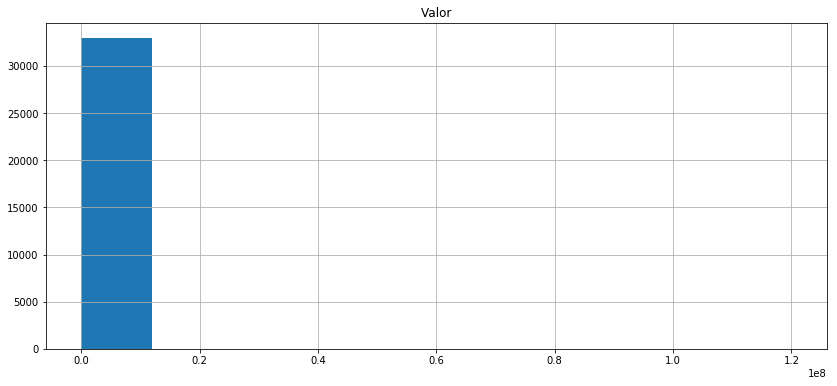

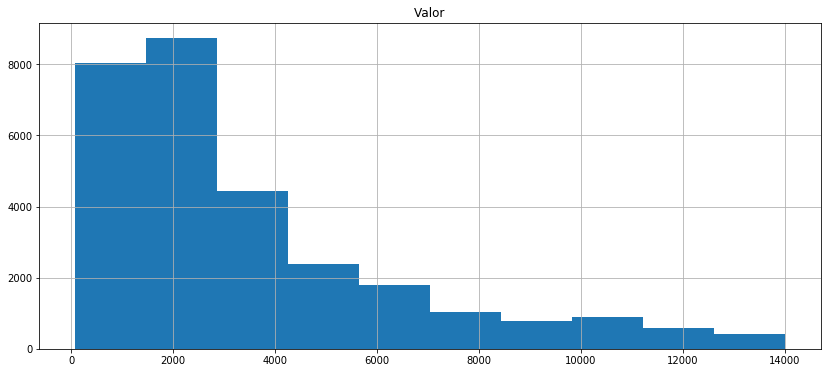

In [82]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

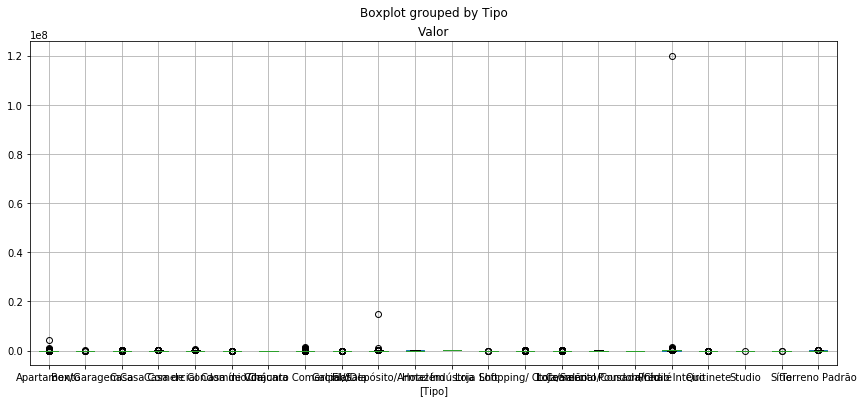

In [84]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [87]:
grupo_tipo = dados.groupby('Tipo')
grupo_tipo = dados.groupby('Tipo')['Valor']
Q1 =  grupo_tipo.quantile(.25)
Q3 =  grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [88]:
limite_superior['Apartamento']

10100.0

In [89]:
for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Box/Garagem
Casa
Casa Comercial
Casa de Condomínio
Casa de Vila
Chácara
Conjunto Comercial/Sala
Flat
Galpão/Depósito/Armazém
Hotel
Indústria
Loft
Loja Shopping/ Ct Comercial
Loja/Salão
Loteamento/Condomínio
Pousada/Chalé
Prédio Inteiro
Quitinete
Studio
Sítio
Terreno Padrão


In [94]:
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite

           Tipo        Bairro  Quartos  Vagas  Suites  Area   Valor  \
3   Apartamento        Centro        1      0       0    15   800.0   
4   Apartamento  Higienópolis        1      0       0    48   800.0   
5   Apartamento  Vista Alegre        3      1       0    70  1200.0   
6   Apartamento      Cachambi        2      0       0    50  1300.0   
10  Apartamento        Centro        1      0       0    36  1200.0   

    Condominio  IPTU  
3        390.0  20.0  
4        230.0   NaN  
5          NaN   NaN  
6        301.0  17.0  
10         NaN   NaN  
             Tipo      Bairro  Quartos  Vagas  Suites  Area  Valor  \
207   Box/Garagem      Tijuca        0      0       0     0  380.0   
373   Box/Garagem      Centro        0      1       0     0  250.0   
579   Box/Garagem      Centro        0      1       0     0  100.0   
885   Box/Garagem  Copacabana        0      9       0     0  450.0   
1014  Box/Garagem  Copacabana        0      1       0     0  450.0   

      Condomin

In [95]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

In [98]:
dados_new.head(10)
dados_new.tail(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
23897,Terreno Padrão,Campo Grande,0,0,0,300,1000.0,NaN,NaN
24235,Terreno Padrão,Barra da Tijuca,0,0,0,588,6000.0,NaN,NaN
24259,Terreno Padrão,Guaratiba,0,0,0,1200,1800.0,NaN,NaN
24382,Terreno Padrão,Vigário Geral,0,0,0,1716,17700.0,NaN,167.0
25845,Terreno Padrão,Vargem Pequena,0,0,0,28120,8000.0,NaN,1500.0
27352,Terreno Padrão,Freguesia (Jacarepaguá),0,0,0,6000,35000.0,NaN,700.0
28257,Terreno Padrão,Botafogo,0,0,0,465,25000.0,NaN,2753.0
29629,Terreno Padrão,Curicica,0,0,0,1200,30000.0,NaN,500.0
30016,Terreno Padrão,Barra da Tijuca,1,0,0,529,35000.0,NaN,1222.0
30916,Terreno Padrão,Recreio dos Bandeirantes,0,0,0,800,8000.0,NaN,500.0


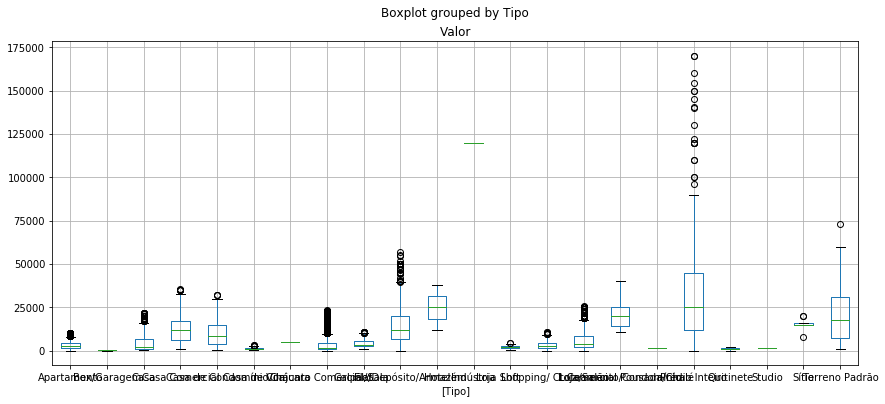

In [97]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [99]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)

# Testando um pouco mais o matplotlib

In [108]:
dados = pd.read_csv('dados/aluguel.csv', sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


/home/cicconella/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/home/cicconella/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

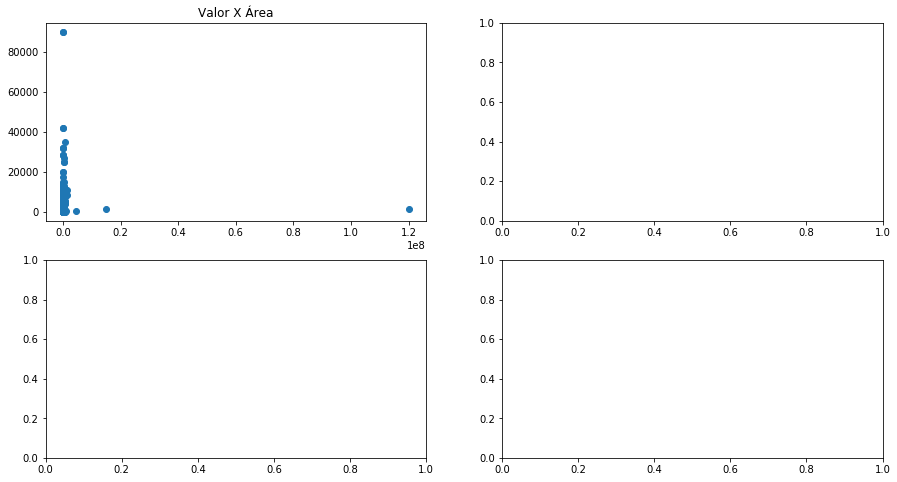

In [109]:
plt.rc('figure', figsize = (15,8))
area = plt.figure() 
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

g1.scatter(dados.Valor, dados.Area)
g1.set_title('Valor X Área')

g2.hist(dados.Valor)
g2.set_title('Histograma')

dados_g3 = dados.Valor.sample(100) 
dados_g3.index = range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title('Amostra (Valor)')

grupo = dados.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor Médio por Tipo')

area.savefig('grafico.png', dpi = 300, bbox_inches = 'tight')